# EDA STARTER

In [2]:
# Import dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# EDA 

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("Hitters_Adjusted_Salary.csv")
df

,Unnamed: 0,yearID,playerID,salary,ADJ Salary,GS,InnOuts,PO,A,E,DP,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,0,1985,benedbr01,545000,1.310892e+06,67.0,1698.0,314,35,4.0,1,ATL,NL,70,208,12,42,6,0,0,20.0,0.0,1.0,22,12.0,1.0,1.0,4.0,2.0,8.0
1,1,1985,ceronri01,625000,1.503317e+06,76.0,2097.0,384,48,6.0,4,ATL,NL,96,282,15,61,9,0,3,25.0,0.0,3.0,29,25.0,1.0,1.0,0.0,4.0,15.0
2,2,1985,chambch01,800000,1.924245e+06,27.0,814.0,299,25,1.0,31,ATL,NL,101,170,16,40,7,0,3,21.0,0.0,0.0,18,22.0,4.0,0.0,0.0,1.0,5.0
3,3,1985,harpete01,250000,6.013267e+05,124.0,3299.0,215,10,5.0,0,ATL,NL,138,492,58,130,15,2,17,72.0,9.0,9.0,44,76.0,4.0,3.0,1.0,2.0,13.0
4,4,1985,hornebo01,1500000,3.607960e+06,125.0,3196.0,917,119,11.0,111,ATL,NL,130,483,61,129,25,3,27,89.0,1.0,1.0,50,57.0,4.0,1.0,0.0,6.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15018,15018,2016,reverbe01,6250000,6.739673e+06,80.0,2141.0,170,2,2.0,1,WAS,NL,103,350,44,76,9,7,2,24.0,14.0,5.0,18,34.0,0.0,3.0,2.0,2.0,12.0
15019,15019,2016,robincl01,534900,5.768082e+05,39.0,1071.0,285,12,2.0,30,WAS,NL,104,196,16,46,4,0,5,26.0,0.0,0.0,20,38.0,0.0,2.0,1.0,5.0,4.0
15020,15020,2016,taylomi02,524000,5.650542e+05,48.0,1376.0,125,5,1.0,0,WAS,NL,76,221,28,51,11,0,7,16.0,14.0,3.0,14,77.0,0.0,1.0,0.0,1.0,2.0
15021,15021,2016,werthja01,21733615,2.343639e+07,133.0,3474.0,201,5,1.0,1,WAS,NL,143,525,84,128,28,0,21,69.0,5.0,1.0,71,139.0,0.0,4.0,0.0,6.0,17.0


## Can skip these if just running models =>

In [ ]:
df = pd.read_csv("Hitters_Adjusted_Salary.csv")
df.info()

corr = df.corr()
corr = corr.style.background_gradient(cmap='Purples')
corr

df.hist(figsize = (15, 15))  

sns.PairGrid(df[["GS", "AB", "R", "H", "2B", "GIDP", "IBB", "BB", "RBI", "HR", "ADJ Salary"]]).map_upper(plt.scatter)

df["yearID"].value_counts()

df["playerID"].value_counts()

df["teamID"].value_counts()

df["H"].value_counts() 

df["R"].value_counts() 

df["RBI"].value_counts() 

df["AB"].value_counts() 

df["ADJ Salary"].value_counts() 

## Can skip these if just running models <=

In [5]:
df = df.drop(columns=["Unnamed: 0"], axis=1)

In [6]:
# totalhits = df["H"]
# doubles = df["2B"]
# triples = df["3B"]
# homeruns = df["HR"]
# atbats = df["AB"]
# walks = df["BB"]
# hit_by_pitch = df["HBP"]
# sac_hits = df["SH"]
# sac_flies = df["SF"]
# singles = (totalhits - homeruns - triples - doubles)

# df["slug_%"] = (singles + 2*doubles + 3*triples + 4*homeruns) / atbats
# df["slug_%"] = df["slug_%"].fillna(0)
# df["avg"] = totalhits / atbats
# df["avg"] = df["avg"].fillna(0)
# df["plate_appearances"] = atbats + walks + hit_by_pitch + sac_hits + sac_flies
# df["avg"] = df["avg"].fillna(0)
# df["on_base_%"] = (totalhits + walks + hit_by_pitch) / (atbats + walks + hit_by_pitch + sac_flies)
# df["on_base_%"] = df["on_base_%"].fillna(0)
# df["1B"] = singles
# df["1B"] = df["1B"].fillna(0)

df["ADJ Salary"] = df["ADJ Salary"].astype("int").round()

# df["ADJ Salary"] = np.log(df["ADJ Salary"])

df = df.dropna().reset_index(drop=True)

agg_df = df.groupby(["playerID"]).mean()

agg_df

,yearID,salary,ADJ Salary,GS,InnOuts,PO,A,E,DP,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
playerID,,,,,,,,,,,,,,,,,,,,,,,,,,
abbotje01,1999.500000,246250.000000,373918.500000,34.000000,887.000000,71.000000,0.5,2.000000,0.000000,53.500000,139.500000,18.500000,36.750000,8.000000,0.500000,4.250000,20.250000,1.500000,1.250000,9.500000,21.250000,0.500000,0.750000,1.250000,1.750000,2.250000
abbotku01,1997.100000,523700.000000,825024.000000,54.700000,1460.200000,101.600000,135.6,9.100000,29.600000,70.200000,204.400000,27.300000,52.300000,10.900000,2.300000,6.200000,24.200000,2.200000,1.100000,13.300000,57.100000,1.100000,1.700000,2.100000,1.200000,3.700000
abercre01,2006.000000,327000.000000,419797.000000,67.000000,1862.000000,176.000000,3.0,5.000000,1.000000,111.000000,255.000000,39.000000,54.000000,12.000000,2.000000,5.000000,24.000000,6.000000,5.000000,18.000000,78.000000,2.000000,3.000000,4.000000,1.000000,2.000000
abernbr01,2002.666667,271666.666667,384418.333333,43.000000,1167.666667,93.000000,124.0,4.666667,31.000000,43.000000,165.666667,16.333333,38.000000,6.000000,1.333333,0.666667,13.333333,3.666667,1.333333,8.666667,16.333333,0.000000,2.000000,3.333333,0.666667,3.333333
abnersh01,1990.166667,150583.333333,290245.833333,40.500000,1204.000000,116.833333,2.0,0.333333,0.500000,62.666667,132.166667,14.000000,29.666667,6.000000,0.500000,1.500000,10.666667,0.833333,1.333333,6.833333,24.166667,1.666667,1.166667,0.833333,1.166667,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuberjo01,1996.000000,109000.000000,179798.000000,20.000000,543.000000,145.000000,11.0,2.000000,10.000000,30.000000,91.000000,7.000000,23.000000,4.000000,0.000000,1.000000,10.000000,1.000000,0.000000,6.000000,11.000000,1.000000,0.000000,1.000000,1.000000,3.000000
zuletju01,2001.000000,200000.000000,292276.000000,23.000000,657.000000,213.000000,7.0,2.000000,11.000000,49.000000,106.000000,11.000000,23.000000,3.000000,0.000000,6.000000,24.000000,0.000000,1.000000,8.000000,32.000000,1.000000,3.000000,0.000000,1.000000,3.000000
zuninmi01,2014.500000,513800.000000,561370.500000,113.000000,3061.000000,909.500000,64.0,5.000000,5.500000,121.500000,394.000000,39.500000,74.000000,15.500000,1.000000,16.500000,44.000000,0.000000,2.000000,19.000000,145.000000,0.500000,11.000000,4.000000,3.000000,9.000000


In [7]:
agg_df.describe()

,yearID,salary,ADJ Salary,GS,InnOuts,PO,A,E,DP,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,2468.000000,2.468000e+03,2.468000e+03,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000
mean,2001.225687,1.343278e+06,1.787430e+06,59.651882,1608.577994,195.434532,67.919360,4.608095,17.633460,77.199857,230.743604,30.181427,59.719028,11.463731,1.316023,6.398417,28.323588,4.247865,1.913765,21.854390,44.695922,1.683607,2.113858,1.627757,1.862957,5.195830
std,9.751349,2.054162e+06,2.488645e+06,39.512137,1031.798891,203.120401,96.897221,4.105398,24.950166,36.980540,149.777507,22.696126,42.679451,8.646194,1.389979,6.838092,22.867051,6.178254,2.062286,17.882112,30.889566,2.274480,2.431574,1.915854,1.587856,4.001660
min,1985.000000,6.000000e+04,1.367340e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1992.787500,2.917424e+05,4.351256e+05,25.500000,722.000000,68.000000,4.397222,1.666667,1.000000,48.458333,104.916667,12.000000,24.000000,4.333333,0.250000,1.333333,10.333333,0.500000,0.428571,8.000000,21.000000,0.121528,0.500000,0.142857,0.600000,2.000000
50%,2001.000000,5.116500e+05,6.767285e+05,55.873016,1512.058824,140.585714,20.000000,3.500000,4.732143,79.000000,213.162338,25.000000,52.607692,9.666667,1.000000,4.000000,22.777778,2.000000,1.285714,17.500000,39.000000,1.000000,1.400000,1.000000,1.555556,4.428571
75%,2010.500000,1.422879e+06,2.102713e+06,91.104167,2417.562500,235.694231,92.270833,6.347222,25.000000,106.517857,348.750000,45.000000,90.906250,17.421875,1.953125,9.333333,41.025000,5.538462,2.773990,31.500000,63.000000,2.250000,3.000000,2.340909,2.833333,7.500000
max,2016.000000,1.810983e+07,2.256694e+07,156.200000,4199.400000,1283.600000,452.750000,29.500000,121.545455,160.000000,634.500000,121.000000,197.000000,42.000000,9.000000,39.000000,113.562500,57.000000,15.153846,116.272727,191.000000,31.272727,35.000000,16.333333,15.000000,23.500000


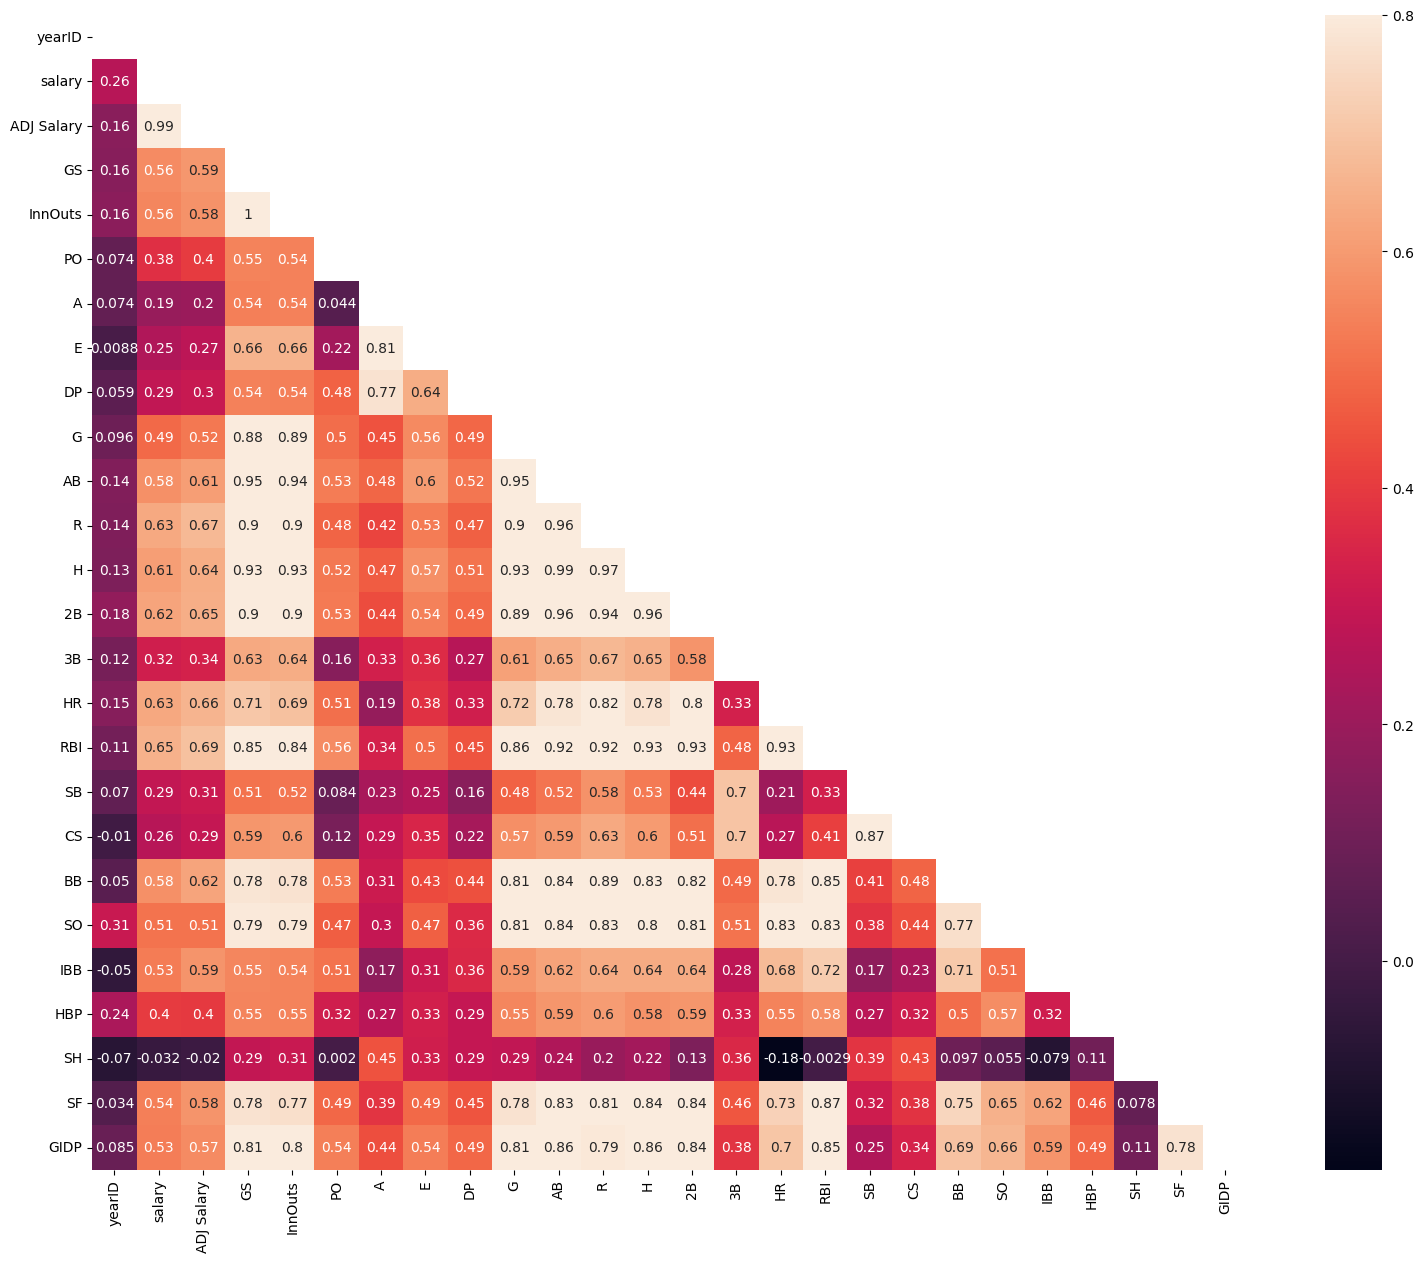

In [8]:
raw_data = list(agg_df.columns)

corrmat = agg_df[raw_data].corr()

#setting the size of plot
fig = plt.figure(figsize = (20, 15))

#masking the upper traingle part since matrix is symmetric(repetitive) 

mask = np.triu(np.ones_like(corrmat, dtype=bool))

sns.heatmap(corrmat, vmax = .8,mask=mask, square = True, annot = True)

plt.show()

In [ ]:
# Create bins in which to place values based upon ADJ Salary
bins = [0, 999999, 5999999, 10000000, 40000000]

# # Create labels for these bins
# group_labels = ["< 1 mill", "1 mill to 5 mill", "6 mill to 10 mill", "> 10 mill"]

# # Slice the data and place it into bins
# pd.cut(new_df["ADJ Salary"], bins, labels=np.arange(4)).head()

no_rookies_df["ADJ Salary Group"] = pd.cut(no_rookies_df["ADJ Salary"], bins, labels=np.arange(4))

In [ ]:
new_df = no_rookies_df.copy()

In [ ]:
new_df.to_csv("cleaned_hitter_no_rookies.csv", index=False)

In [ ]:
new_df

# Linear Regression Benchmark

In [9]:
df = agg_df.copy()
df

# Assign X and y


X = df[["R","H","RBI"]]

# X = df[["RBI"]]


y = df["ADJ Salary"]


# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

# Create a scaler to standardize the data

scaler = MinMaxScaler()

# Train the scaler with the X_train data.

scaler.fit(X_train)

# Transform X_train and X_test.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression().fit(X_train_scaled, y_train)

# Score the model

print(f"STD SCALER Linear Regression Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"STD SCALER Linear Regression Testing Data Score: {model.score(X_test_scaled, y_test)}\n\n") 

model = LinearRegression().fit(X_train, y_train)

# Score the model

print(f"NO SCALER Linear Regression Training Data Score: {model.score(X_train, y_train)}")
print(f"NO SCALER Linear Regression Testing Data Score: {model.score(X_test, y_test)}")

STD SCALER Linear Regression Training Data Score: 0.5101167877290594
STD SCALER Linear Regression Testing Data Score: 0.4518198990561263


NO SCALER Linear Regression Training Data Score: 0.5101167877290596
NO SCALER Linear Regression Testing Data Score: 0.4518198990561264


# K-means benchmark

In [ ]:
#Windows KMeans bug fix

import os
os.environ["OMP_NUM_THREADS"] = '1'

df = agg_df.copy()
df

# Assign X and y

X = df.drop(columns=["ADJ Salary", "yearID"], axis=1)
y = df["ADJ Salary"]

# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

# Create a scaler to standardize the data

scaler = StandardScaler()

# Train the scaler with the X_train data.

scaler.fit(X_train)

# Transform X_train and X_test.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Finding the best value for k using the Elbow Curve
inertia = []
k = list(range(1, 9))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# K-nearest neighbors

In [ ]:
df = agg_df.copy()
df

# Assign X and y

X = df.drop(columns=["ADJ Salary", "yearID"], axis=1)
y = df["ADJ Salary"]

# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

# Create a scaler to standardize the data

scaler = StandardScaler()

# Train the scaler with the X_train data.

scaler.fit(X_train)

# Transform X_train and X_test.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.

train_scores = []
test_scores = []

for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
        
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [ ]:
# Note that k: 7 provides the best accuracy where the classifier starts to stablize

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)

print("k=7 Test Acc: %.3f" % knn.score(X_test_scaled, y_test))

y_pred_knn = knn.predict(X_test_scaled)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print(cm_knn)
print(classification_report(y_test, y_pred_knn))

# Note that each pair always adds up to exactly 1

y_pred_proba_knn = knn.predict_proba(X_test_scaled[0:10])[:, 1]
print(f"Prediction probabilities: \n\n{y_pred_proba_knn}")

# Random Forest Benchmark

In [ ]:
# See what Random Forest offers

df = agg_df.copy()
df

# Assign X and y

X = df.drop(columns=["ADJ Salary", "yearID"], axis=1)
y = df["ADJ Salary"]

# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

# Create a scaler to standardize the data

scaler = StandardScaler()

# Train the scaler with the X_train data.

scaler.fit(X_train)

# Transform X_train and X_test.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = RandomForestClassifier(random_state=0, n_estimators=200, max_depth=7).fit(X_train_scaled, y_train)

print(f"RandomForestClassifier Training Score: {clf.score(X_train_scaled, y_train)}")
print(f"RandomForestClassifier Testing Score: {clf.score(X_test_scaled, y_test)}\n\n")

# Now try with the selected features

sel = SelectFromModel(clf).fit(X_train_scaled, y_train)

X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X_train_scaled), y_train, random_state=0)

scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

clf = RandomForestClassifier(random_state=0, n_estimators=200, max_depth=7).fit(X_selected_train_scaled, y_train)

print(f"SelectFromModel RandomForestClassifier Training Score: {clf.score(X_selected_train_scaled, y_train)}")
print(f"SelectFromModel RandomForestClassifier Testing Score: {clf.score(X_selected_test_scaled, y_test)}")

# Extra Trees Benchmark

In [ ]:
df = new_df.copy()
df

# Assign X and y

X = df.drop(columns=["ADJ Salary", "ADJ Salary Group", "yearID", "playerID", "teamID"], axis=1)
y = df["ADJ Salary Group"]

# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

# Create a scaler to standardize the data

scaler = MinMaxScaler()

# Train the scaler with the X_train data.

scaler.fit(X_train)

# Transform X_train and X_test.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = ExtraTreesClassifier(max_depth=7).fit(X_train_scaled, y_train)

print(f"ExtraTreesClassifier Training Score: {model.score(X_train_scaled, y_train)}")
print(f"ExtraTreesClassifier Testing Score: {model.score(X_test_scaled, y_test)}\n\n")


# Now try with the selected features

sel = SelectFromModel(model).fit(X_train_scaled, y_train)

X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X_train_scaled), y_train, random_state=0)

scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

model = ExtraTreesClassifier(max_depth=7).fit(X_selected_train_scaled, y_train)

print(f"SelectFromModel ExtraTreesClassifier Training Score: {model.score(X_selected_train_scaled, y_train)}")
print(f"SelectFromModel ExtraTreesClassifier Testing Score: {model.score(X_selected_test_scaled, y_test)}")

# SVM Benchmark

In [ ]:
# Support vector machine linear classifier

from sklearn.svm import SVC 

df = agg_df.copy()
df

# Assign X and y

X = df[["R","H","RBI"]]
y = df["ADJ Salary"]

# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

# Create a scaler to standardize the data

scaler = StandardScaler()

# Train the scaler with the X_train data.

scaler.fit(X_train)

# Transform X_train and X_test.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(kernel="linear")
model.fit(X_train_scaled, y_train)

# Model Accuracy

print(f"SVC Training Score: {model.score(X_train_scaled, y_train)}")
print(f"SVC Testing Score: {model.score(X_test_scaled, y_test)}")

predictions = model.predict(X_test_scaled)

print(classification_report(y_test, predictions))